In [3]:
import tensorflow as tf

## Create data to view and fit

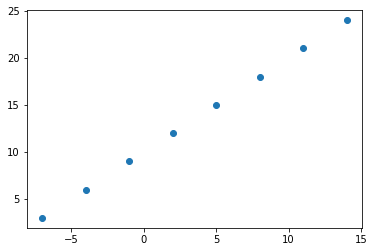

In [7]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])


y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize it
plt.scatter(X, y);

In [9]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [11]:
# Create a demo tensor for our housing price prediction problems
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [14]:
X[0], y[0]

(-7.0, 3.0)

In [15]:
X[1], y[1]

(-4.0, 6.0)

In [17]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [18]:
X[0].ndim

0

In [20]:
X[0], y[0]

(-7.0, 3.0)

In [22]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [24]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

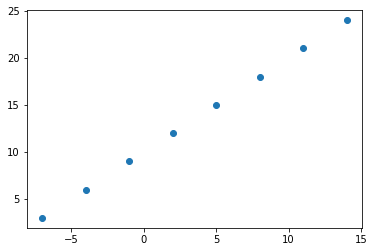

In [26]:
plt.scatter(X, y)

## Steps in modelling with tensorFlow
1. Creating a model - define the input output hidden layers.
2. Compile a model - define the loss function and optimizer
and evaluation.
3. Fitting a model (training)

In [60]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model usting the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # Mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # Stocchastic gradient descent
              metrics=['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/100
1/1 [==============================] - 0s 280ms/step - loss: 13.3030 - mae: 13.3030
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 12.9322 - mae: 12.9322
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 12.5772 - mae: 12.5772
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 12.2333 - mae: 12.2333
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 11.9221 - mae: 11.9221
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 11.6151 - mae: 11.6151
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 11.2956 - mae: 11.2956
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 10.9702 - mae: 10.9702
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 10.6821 - mae: 10.6821
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 10.4218 - mae: 10.4218
Epoch 11/100
1/1 [==============================] - 0s 2m

In [37]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [54]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred + 11

array([[33.990475]], dtype=float32)

# Improving our model
We can improve our model, by altering the steps we took to create a model
1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation layer.
2. **Compile a model** - here we might change the optimizer or the learning rate,
3. **Fitting a model** - More epochs or on more data

In [61]:
# 1. Create a model usting the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # Mean absolute error
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), # Stocchastic gradient descent
              metrics=['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 295ms/step - loss: 13.3770 - mae: 13.3770
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 12.9686 - mae: 12.9686
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 12.5829 - mae: 12.5829
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 12.2199 - mae: 12.2199
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 11.8494 - mae: 11.8494
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 11.4647 - mae: 11.4647
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 11.0718 - mae: 11.0718
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 10.6688 - mae: 10.6688
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 10.2875 - mae: 10.2875
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 9.9465 - mae: 9.9465
Epoch 11/100
1/1 [==============================] - 0s 2ms/

In [63]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [67]:
model.predict([17.0])

array([[31.097635]], dtype=float32)

In [69]:
# 1. Create a model usting the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # Mean absolute error
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01), # Stocchastic gradient descent
              metrics=['mae'])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 216ms/step - loss: 12.3469 - mae: 12.3469
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 11.6170 - mae: 11.6170
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 10.8837 - mae: 10.8837
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 10.1465 - mae: 10.1465
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 9.4040 - mae: 9.4040
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 8.6532 - mae: 8.6532
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 7.8904 - mae: 7.8904
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 7.1120 - mae: 7.1120
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 6.8174 - mae: 6.8174
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 7.1412 - mae: 7.1412
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - los

In [71]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [73]:
model.predict([17])

array([[26.209171]], dtype=float32)

## Evaluating a model
In practice, a typical workflow you'll go through when bulding neural network is:
```
Build a model -> fit it -> evaluate it -> tweak a model -> evaluate it -> tweak a model -> evaluate it...
```


When it comes to evaluation...
> "Visualise visualize visualize"

It's good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself = what does our model look like?
* THe training of a model - how does a model perform while it learns?
* The predictions of the model

In [75]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
y = X + 10
X, y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

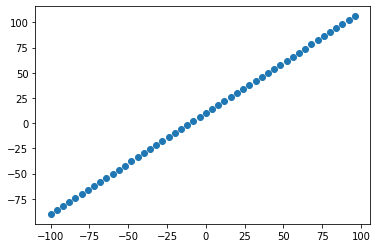

In [130]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets ...


In [80]:
# from sklearn.model_selection import train_test_split
#
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(X)

50

In [81]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

### Visualizing the data

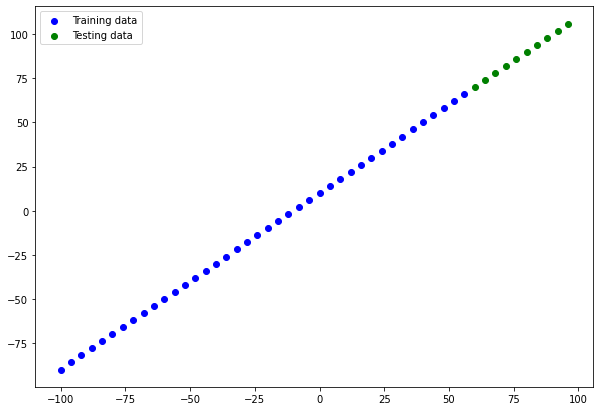

In [83]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label="Training data")
plt.scatter(X_test, y_test, c='g', label="Testing data")
# Show a legend
plt.legend()

In [90]:
# Traing on new train data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2923 - mae: 0.2923
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 0.8780 - mae: 0.8780
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0113 - mae: 0.0113
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 0.7589 - mae: 0.7589
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2861 - mae: 0.2861
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 0.4216 - mae: 0.4216
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6317 - mae: 0.6317
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 0.2624 - mae: 0.2624
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 0.9978 - mae: 0.9978
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6015 - mae: 0.6015
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - loss: 1.6299 

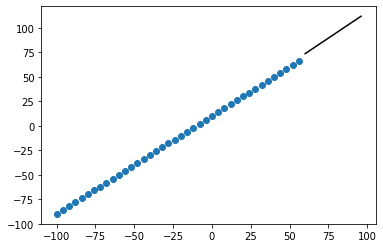

In [91]:
# predict values and plot line on values
predictions = model.predict(X_test)
plt.scatter(X_train, y_train)
plt.plot(X_test, predictions, color='k')

In [96]:
#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#2. compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])
#3. Fit
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

### Visualizing the model

In [99]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [141]:
# Let's create the model which builds automatically be defining the input shape
tf.random.set_seed(42)

#Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=[1]),
    tf.keras.layers.Dense(1),
])
# Compile the model
model.compile(loss= tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])
model.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 50)                100       
                                                                 
 dense_79 (Dense)            (None, 1)                 51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [142]:
model.fit(X_train, y_train,epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 35.8233 - mae: 35.8233
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 21.7558 - mae: 21.7558
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 9.9130 - mae: 9.9130
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 11.5131 - mae: 11.5131
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 14.5001 - mae: 14.5001
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 15.0784 - mae: 15.0784
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 13.2625 - mae: 13.2625
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 10.3109 - mae: 10.3109
Epoch 9/100
2/2 [==============================] - 0s 1ms/step - loss: 7.9467 - mae: 7.9467
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 9.6544 - mae: 9.6544
Epoch 11/100
2/2 [==============================] - 0s 2ms/step -

In [117]:
from tensorflow.keras.utils import plot_model
plot_model(model=model)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


### Visualize model predictions
plotting on truth labels

In [154]:
y_pred = model.predict(X_test)
y_pred

array([[ 69.585754],
       [ 73.55872 ],
       [ 77.53168 ],
       [ 81.50465 ],
       [ 85.47761 ],
       [ 89.450584],
       [ 93.423546],
       [ 97.39652 ],
       [101.36947 ],
       [105.34244 ]], dtype=float32)

In [134]:
#Let's create a plotting function
def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    y_predictions=y_pred):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c='b', label='Training data')
    plt.scatter(test_data, test_labels, c='g', label='Test data')
    plt.scatter(test_data, y_predictions, c='r', label='Predictions')
    plt.legend()

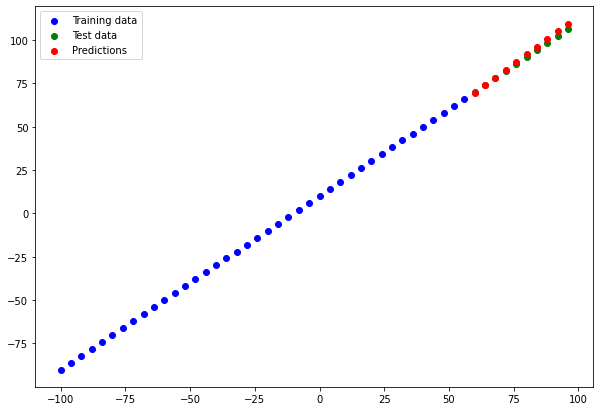

In [155]:
plot_prediction()

### Evaulating our model's prediction with regression evaluation
Dependin on the problem you're working on, there will be different evaluation metrics.

For regression two main metrics:
* MAE - mean absolute error
* MSE - mean square error

In [156]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 13ms/step - loss: 0.5359 - mae: 0.5359


[0.535906195640564, 0.535906195640564]

In [163]:
# Calculate the mean absolute error

tf.keras.losses.MAE(y_test, tf.transpose(y_pred))

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.53590316], dtype=float32)>

In [165]:
# Calcualte the mean square error
tf.keras.losses.MSE(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=0.29322195>

### Runnign experiments to improve our model

1. Get more data
2. Make your model larger - more layer or more hidden unit
3. Train for longer

Let's do 3 modeling experiments:
1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs


In [175]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# 2. Compile model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])
# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 1ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 1ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 1ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 1ms/step - l

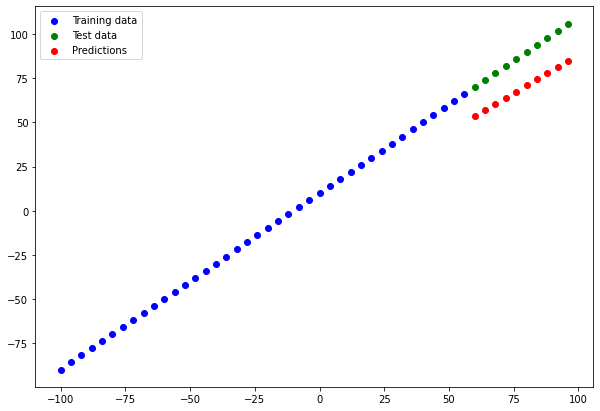

In [181]:
# Make and plot predicitons for model_1
y_pred_1 = model_1.predict(X_test)
plot_prediction(y_predictions=y_pred_1)

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
insurance_one_hot = pd.get_dummies(insurance)

In [4]:
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [5]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [6]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [7]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42) # set random state for reproducible splits

In [8]:
type(y_train), type(X_train)

(pandas.core.series.Series, pandas.core.frame.DataFrame)

In [9]:
X_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.95,2,1,0,1,0,0,1,0,0
1285,47,24.32,0,1,0,1,0,1,0,0,0
1142,52,24.86,0,1,0,1,0,0,0,1,0
969,39,34.32,5,1,0,1,0,0,0,1,0
486,54,21.47,3,1,0,1,0,0,1,0,0


In [19]:
# Set random seed
tf.random.set_seed(42)

# Create a new model (same as model_2)
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 645us/step - loss: 8637.0996 - mae: 8637.0996
Epoch 2/100
34/34 [==============================] - 0s 602us/step - loss: 7886.7769 - mae: 7886.7769
Epoch 3/100
34/34 [==============================] - 0s 608us/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 580us/step - loss: 7792.0225 - mae: 7792.0225
Epoch 5/100
34/34 [==============================] - 0s 616us/step - loss: 7748.3892 - mae: 7748.3892
Epoch 6/100
34/34 [==============================] - 0s 580us/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 665us/step - loss: 7589.9849 - mae: 7589.9849
Epoch 8/100
34/34 [==============================] - 0s 605us/step - loss: 7698.5591 - mae: 7698.5591
Epoch 9/100
34/34 [==============================] - 0s 583us/step - loss: 7496.7788 - mae: 7496.7788
Epoch 10/100
34/34 [==============================] - 0s 603us/step - loss: 7493.1

In [12]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 713us/step - loss: 7023.3286 - mae: 7023.3286


[7023.32861328125, 7023.32861328125]

In [37]:
#1. Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
#2. Compile model
model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])
#3. Fit the data
model.fit(X_train, y_train, epochs=100)

Epoch 1/400
34/34 [==============================] - 0s 760us/step - loss: 13292.2461 - mae: 13292.2461
Epoch 2/400
34/34 [==============================] - 0s 801us/step - loss: 13105.9336 - mae: 13105.9336
Epoch 3/400
34/34 [==============================] - 0s 692us/step - loss: 12714.8584 - mae: 12714.8584
Epoch 4/400
34/34 [==============================] - 0s 734us/step - loss: 11954.6973 - mae: 11954.6973
Epoch 5/400
34/34 [==============================] - 0s 1ms/step - loss: 10719.0762 - mae: 10719.0762
Epoch 6/400
34/34 [==============================] - 0s 727us/step - loss: 9228.0986 - mae: 9228.0986
Epoch 7/400
34/34 [==============================] - 0s 818us/step - loss: 7977.9951 - mae: 7977.9951
Epoch 8/400
34/34 [==============================] - 0s 785us/step - loss: 7497.7695 - mae: 7497.7695
Epoch 9/400
34/34 [==============================] - 0s 730us/step - loss: 7432.5864 - mae: 7432.5864
Epoch 10/400
34/34 [==============================] - 0s 726us/step - loss

In [39]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 723us/step - loss: 3159.1980 - mae: 3159.1980


[3159.197998046875, 3159.197998046875]

In [50]:
#1. Create model
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
#2. Compile model
model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])
#3. Fit the data
history = model_3.fit(X_train, y_train, epochs=500, callbacks=[callback])

Epoch 1/500
34/34 [==============================] - 0s 846us/step - loss: 13296.6523 - mae: 13296.6523
Epoch 2/500
34/34 [==============================] - 0s 1ms/step - loss: 13142.7734 - mae: 13142.7734
Epoch 3/500
34/34 [==============================] - 0s 911us/step - loss: 12816.3633 - mae: 12816.3633
Epoch 4/500
34/34 [==============================] - 0s 769us/step - loss: 12168.8496 - mae: 12168.8496
Epoch 5/500
34/34 [==============================] - 0s 762us/step - loss: 11068.5781 - mae: 11068.5781
Epoch 6/500
34/34 [==============================] - 0s 788us/step - loss: 9633.6367 - mae: 9633.6367
Epoch 7/500
34/34 [==============================] - 0s 752us/step - loss: 8282.1387 - mae: 8282.1387
Epoch 8/500
34/34 [==============================] - 0s 801us/step - loss: 7575.3169 - mae: 7575.3169
Epoch 9/500
34/34 [==============================] - 0s 746us/step - loss: 7443.4146 - mae: 7443.4146
Epoch 10/500
34/34 [==============================] - 0s 757us/step - loss

In [51]:
model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 823us/step - loss: 3263.5952 - mae: 3263.5952


[3263.59521484375, 3263.59521484375]

Text(0.5, 0, 'epochs')

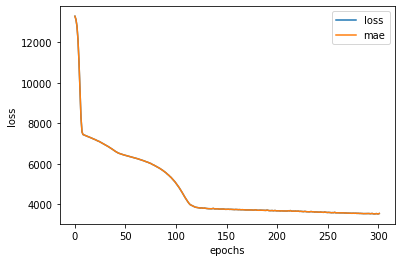

In [52]:
#Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Preprocessing data (normalization and standarization)

<AxesSubplot:ylabel='Frequency'>

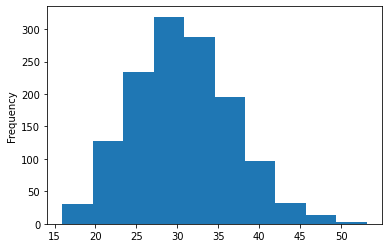

In [53]:
X['bmi'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

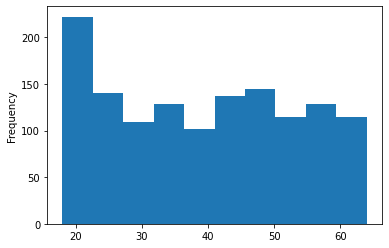

In [55]:
X['age'].plot(kind='hist')

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [61]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ct.fit(X_train)
#Transform trainnig and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

# What does our data look like now?
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [66]:
#1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])
#2. Compile the model
model_4.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])
#3 Fit the data
model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 735us/step - loss: 13343.7480 - mae: 13343.7480
Epoch 2/100
34/34 [==============================] - 0s 755us/step - loss: 13334.9346 - mae: 13334.9346
Epoch 3/100
34/34 [==============================] - 0s 745us/step - loss: 13313.3213 - mae: 13313.3213
Epoch 4/100
34/34 [==============================] - 0s 747us/step - loss: 13267.9600 - mae: 13267.9600
Epoch 5/100
34/34 [==============================] - 0s 736us/step - loss: 13187.5420 - mae: 13187.5420
Epoch 6/100
34/34 [==============================] - 0s 715us/step - loss: 13061.3076 - mae: 13061.3076
Epoch 7/100
34/34 [==============================] - 0s 718us/step - loss: 12879.1426 - mae: 12879.1426
Epoch 8/100
34/34 [==============================] - 0s 764us/step - loss: 12630.6299 - mae: 12630.6299
Epoch 9/100
34/34 [==============================] - 0s 722us/step - loss: 12305.3115 - mae: 12305.3115
Epoch 10/100
34/34 [==============================] - 0s 735us/s

In [69]:
model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 761us/step - loss: 3435.3818 - mae: 3435.3818


[3435.3818359375, 3435.3818359375]

In [73]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])
model_5.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])
model_5.fit(X_train_normal, y_train, epochs=300)

Epoch 1/300
34/34 [==============================] - 0s 879us/step - loss: 13344.0674 - mae: 13344.0674
Epoch 2/300
34/34 [==============================] - 0s 753us/step - loss: 13336.0674 - mae: 13336.0674
Epoch 3/300
34/34 [==============================] - 0s 740us/step - loss: 13316.0605 - mae: 13316.0605
Epoch 4/300
34/34 [==============================] - 0s 770us/step - loss: 13273.6592 - mae: 13273.6592
Epoch 5/300
34/34 [==============================] - 0s 779us/step - loss: 13197.8848 - mae: 13197.8848
Epoch 6/300
34/34 [==============================] - 0s 773us/step - loss: 13077.4814 - mae: 13077.4814
Epoch 7/300
34/34 [==============================] - 0s 795us/step - loss: 12901.8105 - mae: 12901.8105
Epoch 8/300
34/34 [==============================] - 0s 795us/step - loss: 12660.4727 - mae: 12660.4727
Epoch 9/300
34/34 [==============================] - 0s 820us/step - loss: 12343.1914 - mae: 12343.1914
Epoch 10/300
34/34 [==============================] - 0s 763us/s

In [74]:
model_5.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 761us/step - loss: 3161.3362 - mae: 3161.3362


[3161.336181640625, 3161.336181640625]